### Baseline Seed 1 - Perturbation Seed 0

In [43]:
# load the baseline results
# read in baseline data
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/training_results/training_res_seed1.csv')

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")
    
print(baseline_df.head())

Baseline data loaded: 118 epochs
   epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0      1  143.198375  114.267337            0.455443            7.497325e-59
1      2   99.003030   91.310430            0.422459            4.797240e-50
2      3   88.155927   84.871568            0.421268            9.572966e-50
3      4   82.863315   80.375895            0.425018            1.076738e-50
4      5   78.583811   76.447118            0.440511            9.591843e-55


In [44]:
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

print(baseline_df)

    epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0       1  143.198375  114.267337            0.455443            7.497325e-59
1       2   99.003030   91.310430            0.422459            4.797240e-50
2       3   88.155927   84.871568            0.421268            9.572966e-50
3       4   82.863315   80.375895            0.425018            1.076738e-50
4       5   78.583811   76.447118            0.440511            9.591843e-55
..    ...         ...         ...                 ...                     ...
93     94   17.675313   29.133197            0.755533           4.658267e-209
94     95   17.545072   29.212518            0.759054           4.063549e-212
95     96   17.450050   29.148153            0.755926           2.132139e-209
96     97   17.317206   29.184973            0.757532           8.660125e-211
97     98   17.214430   29.101309            0.755587           4.177484e-209

[98 rows x 5 columns]


In [45]:
# get all of the training run results from the perturbation length experiments

# path to base directory of the perturbation length experiments
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed1_perturbseed0')

# list all training run directories in the results_dir
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir()
                  and d.name.startswith('random_target')])

for run_dir in run_dirs:
    print(run_dir.name)

random_target_e10_l10
random_target_e10_l2
random_target_e10_l20
random_target_e10_l30
random_target_e10_l40
random_target_e10_l5
random_target_e10_l50
random_target_e13_l10
random_target_e13_l20
random_target_e13_l30
random_target_e13_l40
random_target_e13_l5
random_target_e13_l50
random_target_e16_l10
random_target_e16_l20
random_target_e16_l30
random_target_e16_l40
random_target_e16_l5
random_target_e16_l50
random_target_e19_l10
random_target_e19_l20
random_target_e19_l30
random_target_e19_l40
random_target_e19_l5
random_target_e19_l50
random_target_e1_l10
random_target_e1_l2
random_target_e1_l20
random_target_e1_l30
random_target_e1_l40
random_target_e1_l5
random_target_e1_l50
random_target_e20_l10
random_target_e20_l2
random_target_e20_l20
random_target_e20_l30
random_target_e20_l40
random_target_e20_l5
random_target_e20_l50
random_target_e22_l5
random_target_e2_l10
random_target_e2_l2
random_target_e2_l20
random_target_e2_l30
random_target_e2_l40
random_target_e2_l5
random_target

In [46]:
# in every run_dir, find the folder called either metrics.csv or training_res.csv
# and read it in as a pandas dataframe

#all_perturb_length_dfs should be a dict mapping run names (strings) to DataFrames, or a list of DataFrames, where each DataFrame has a 'test_loss' column and its indices represent epochs. 

all_perturb_length_dfs = {}

for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

Found results csv in random_target_e10_l10
Found results csv in random_target_e10_l2
Found results csv in random_target_e10_l20
Found results csv in random_target_e10_l30
Found results csv in random_target_e10_l40
Found results csv in random_target_e10_l5
Found results csv in random_target_e10_l50
Found results csv in random_target_e13_l10
Found results csv in random_target_e13_l20
Found results csv in random_target_e13_l30
Found results csv in random_target_e13_l40
Found results csv in random_target_e13_l5
Found results csv in random_target_e13_l50
Found results csv in random_target_e16_l10
Found results csv in random_target_e16_l20
Found results csv in random_target_e16_l30
Found results csv in random_target_e16_l40
Found results csv in random_target_e16_l5
Found results csv in random_target_e16_l50
Found results csv in random_target_e19_l10
Found results csv in random_target_e19_l20
Found results csv in random_target_e19_l30
Found results csv in random_target_e19_l40
Found results c

In [47]:
# filter out the rows that were from before early stopping kicked in (but after the minimum test loss was achieved)

all_perturb_length_data = {}

for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue

    # Find the epoch with minimum test loss
    min_test_loss_idx = df['test_loss'].idxmin()

    # Keep all rows up to and including the minimum test loss epoch
    filtered_df = df.loc[:min_test_loss_idx].copy()

    all_perturb_length_data[run_name] = filtered_df

    # Print info about the filtering
    original_epochs = len(df)
    filtered_epochs = len(filtered_df)
    removed_epochs = original_epochs - filtered_epochs
    print(f"{run_name}: {original_epochs} -> {filtered_epochs} epochs "
            f"(removed {removed_epochs} epochs after minimum test loss)")

random_target_e10_l10: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l2: 95 -> 75 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l20: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l30: 119 -> 99 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l40: 127 -> 107 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l5: 97 -> 77 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l50: 136 -> 116 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l10: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l20: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l30: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l40: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l5: 106 -> 86 epochs (removed 20 epochs after minimum test

In [48]:

# First, let's examine the actual run names to understand the format
print("Actual run names:")
for run_name, df in all_perturb_length_dfs.items():
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for run_name, df in all_perturb_length_dfs.items():
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")


Actual run names:
  random_target_e10_l10
  random_target_e10_l2
  random_target_e10_l20
  random_target_e10_l30
  random_target_e10_l40
  random_target_e10_l5
  random_target_e10_l50
  random_target_e13_l10
  random_target_e13_l20
  random_target_e13_l30
  random_target_e13_l40
  random_target_e13_l5
  random_target_e13_l50
  random_target_e16_l10
  random_target_e16_l20
  random_target_e16_l30
  random_target_e16_l40
  random_target_e16_l5
  random_target_e16_l50
  random_target_e19_l10
  random_target_e19_l20
  random_target_e19_l30
  random_target_e19_l40
  random_target_e19_l5
  random_target_e19_l50
  random_target_e1_l10
  random_target_e1_l2
  random_target_e1_l20
  random_target_e1_l30
  random_target_e1_l40
  random_target_e1_l5
  random_target_e1_l50
  random_target_e20_l10
  random_target_e20_l2
  random_target_e20_l20
  random_target_e20_l30
  random_target_e20_l40
  random_target_e20_l5
  random_target_e20_l50
  random_target_e22_l5
  random_target_e2_l10
  random_target_


Summary Statistics:
  Baseline maximum BA (epoch 53): 0.7790
  Total runs: 105
  Mean deviation: -0.0059
  Standard deviation: 0.0053
  Min deviation: -0.0200
  Max deviation: 0.0064
  Runs better than baseline maximum: 9
  Runs worse than baseline maximum: 96


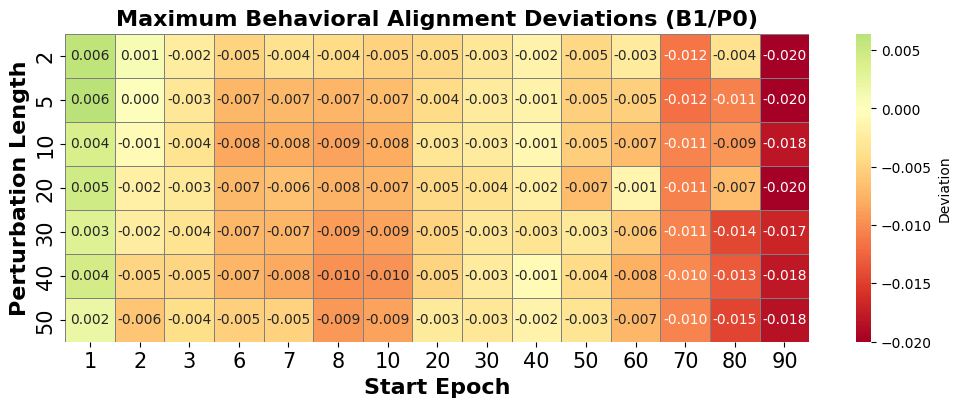

In [49]:
# show the deviation of the best experiment behavioral alignment from best baseline behavioral alignment in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline behavioral alignment
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

# Get maximum behavioral alignment from baseline run
baseline_max_ba = baseline_df['behavioral_rsa_rho'].max()
baseline_max_epoch = baseline_df.loc[baseline_df['behavioral_rsa_rho'].idxmax(), 'epoch']

# Collect maximum behavioral alignment deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get maximum behavioral alignment value reached in this run
    max_ba = df_sorted['behavioral_rsa_rho'].max()
    max_ba_epoch = df_sorted.loc[df_sorted['behavioral_rsa_rho'].idxmax(), 'epoch']
    
    # Calculate deviation from baseline maximum
    # (positive = better than baseline, negative = worse)
    deviation = max_ba - baseline_max_ba

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'max_ba': max_ba,
        'max_ba_epoch': max_ba_epoch,
        'baseline_max_ba': baseline_max_ba
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',  # Red-Yellow-Green colormap (red=worse, green=better)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Maximum Behavioral Alignment Deviations (B1/P0)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline maximum BA (epoch {baseline_max_epoch}): {baseline_max_ba:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline maximum: {len(deviation_df[deviation_df['deviation'] > 0])}")
print(f"  Runs worse than baseline maximum: {len(deviation_df[deviation_df['deviation'] < 0])}")

## REVISED CODE ATTEMPT

Baseline data loaded: 118 epochs
Baseline filtered to 98 epochs (up to min test loss)
Loaded 136 perturbation runs
Filtered 136 runs to min test loss
Calculated deviations for 105 runs


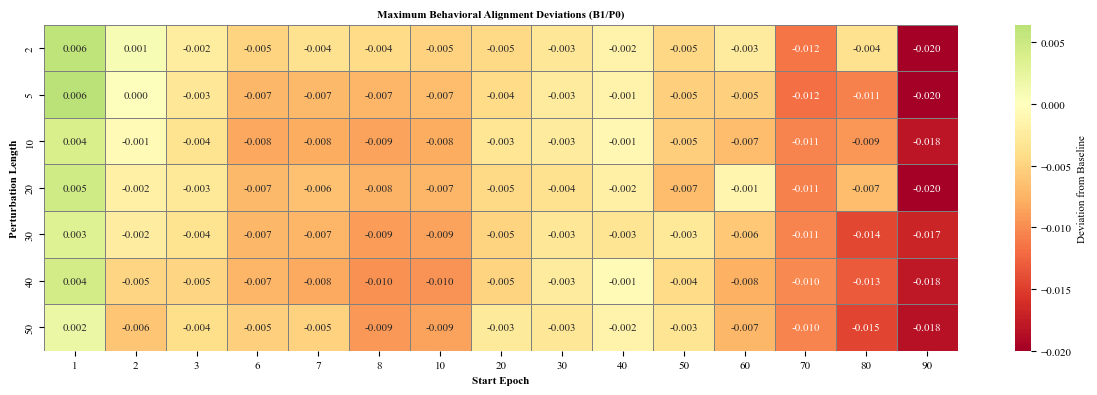


Baseline maximum BA (epoch 53): 0.7790
Mean deviation: -0.0059
Std deviation: 0.0053
Min deviation: -0.0200
Max deviation: 0.0064
Runs better than baseline: 9
Runs worse than baseline: 96


In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# =============================================================================
# Load and filter baseline data
# =============================================================================
baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/training_results/training_res_seed1.csv')
baseline_df = pd.read_csv(baseline_csv)
print(f"Baseline data loaded: {len(baseline_df)} epochs")

# Filter baseline to minimum test loss epoch
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()
baseline_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()
print(f"Baseline filtered to {len(baseline_df)} epochs (up to min test loss)")

# =============================================================================
# Load perturbation experiment data
# =============================================================================
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed1_perturbseed0')

# List all training run directories
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir() and d.name.startswith('random_target')])

# Load all data files
all_perturb_length_dfs = {}
for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

print(f"Loaded {len(all_perturb_length_dfs)} perturbation runs")

# =============================================================================
# Filter perturbation data to minimum test loss
# =============================================================================
all_perturb_length_data = {}
for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue
    min_test_loss_idx = df['test_loss'].idxmin()
    filtered_df = df.loc[:min_test_loss_idx].copy()
    all_perturb_length_data[run_name] = filtered_df

print(f"Filtered {len(all_perturb_length_data)} runs to min test loss")

# =============================================================================
# Parse run metadata and calculate deviations
# =============================================================================
baseline_max_ba = baseline_df['behavioral_rsa_rho'].max()
baseline_max_epoch = baseline_df.loc[baseline_df['behavioral_rsa_rho'].idxmax(), 'epoch']

deviation_data = []
for run_name, df in all_perturb_length_data.items():
    # Parse run name: "random_target_e{epoch}_l{length}"
    if 'random_target_e' not in run_name:
        continue
    
    parts = run_name.split('_')
    start_epoch = None
    length = None
    
    for part in parts:
        if part.startswith('e') and part[1:].isdigit():
            start_epoch = int(part[1:])
        elif part.startswith('l') and part[1:].isdigit():
            length = int(part[1:])
    
    if start_epoch is None or length is None or len(df) == 0:
        continue
    
    # Get maximum behavioral alignment value reached in this run
    df_sorted = df.sort_values('epoch')
    max_ba = df_sorted['behavioral_rsa_rho'].max()
    max_ba_epoch = df_sorted.loc[df_sorted['behavioral_rsa_rho'].idxmax(), 'epoch']
    
    # Calculate deviation from baseline maximum
    deviation = max_ba - baseline_max_ba
    
    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'max_ba': max_ba,
        'max_ba_epoch': max_ba_epoch
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

print(f"Calculated deviations for {len(deviation_df)} runs")

# =============================================================================
# Create heatmap
# =============================================================================
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'
)

heatmap_data = heatmap_data.sort_index(axis=0)
heatmap_data = heatmap_data.sort_index(axis=1)

# Add this at the beginning of your script, after imports
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 8

# Then modify your heatmap section:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',
    center=0,
    cbar_kws={'label': 'Deviation from Baseline'},
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'fontsize': 8, 'fontfamily': 'Times New Roman'}  # Add this line
)
ax.set_xlabel('Start Epoch', fontsize=8, fontweight='bold', fontfamily='Times New Roman')
ax.set_ylabel('Perturbation Length', fontsize=8, fontweight='bold', fontfamily='Times New Roman')
ax.set_title('Maximum Behavioral Alignment Deviations (B1/P0)', fontsize=8, fontweight='bold', fontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Set tick label font
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontfamily('Times New Roman')
    label.set_fontsize(8)

# Set colorbar label font
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Deviation from Baseline', fontsize=8, fontfamily='Times New Roman')
cbar.ax.tick_params(labelsize=8)
for label in cbar.ax.get_yticklabels():
    label.set_fontfamily('Times New Roman')

plt.tight_layout()
plt.show()

# =============================================================================
# Print summary statistics
# =============================================================================
print(f"\nBaseline maximum BA (epoch {baseline_max_epoch}): {baseline_max_ba:.4f}")
print(f"Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"Std deviation: {deviation_df['deviation'].std():.4f}")
print(f"Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"Runs better than baseline: {len(deviation_df[deviation_df['deviation'] > 0])}")
print(f"Runs worse than baseline: {len(deviation_df[deviation_df['deviation'] < 0])}")

### Baseline Seed 2 - Perturbation Seed 1

Baseline data loaded: 112 epochs
Baseline filtered to 92 epochs (up to min test loss)
Loaded 102 perturbation runs
Filtered 102 runs to min test loss
Calculated deviations for 102 runs


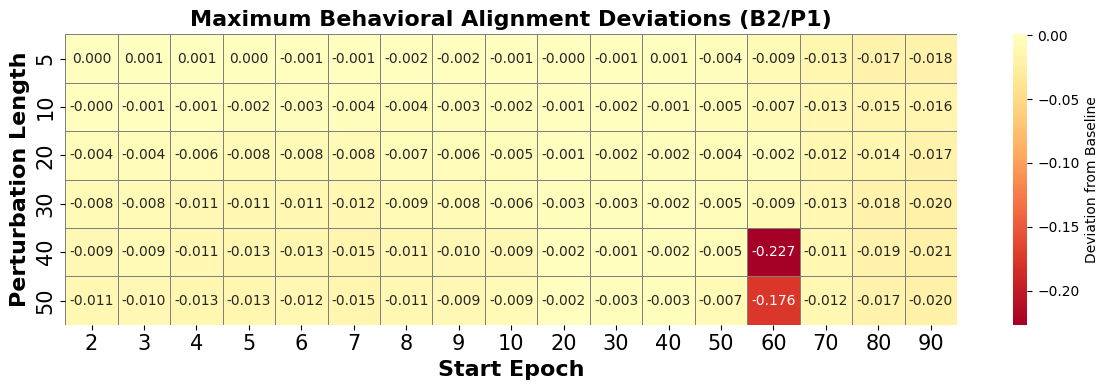


Baseline maximum BA (epoch 47): 0.7604
Mean deviation: -0.0112
Std deviation: 0.0278
Min deviation: -0.2266
Max deviation: 0.0007
Runs better than baseline: 5
Runs worse than baseline: 97


In [51]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# =============================================================================
# Load and filter baseline data
# =============================================================================
baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed2/training_results/training_res_seed2.csv')
baseline_df = pd.read_csv(baseline_csv)
print(f"Baseline data loaded: {len(baseline_df)} epochs")

# Filter baseline to minimum test loss epoch
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()
baseline_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()
print(f"Baseline filtered to {len(baseline_df)} epochs (up to min test loss)")

# =============================================================================
# Load perturbation experiment data
# =============================================================================
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed2_perturbseed1')

# List all training run directories
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir() and d.name.startswith('random_target')])

# Load all data files
all_perturb_length_dfs = {}
for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

print(f"Loaded {len(all_perturb_length_dfs)} perturbation runs")

# =============================================================================
# Filter perturbation data to minimum test loss
# =============================================================================
all_perturb_length_data = {}
for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue
    min_test_loss_idx = df['test_loss'].idxmin()
    filtered_df = df.loc[:min_test_loss_idx].copy()
    all_perturb_length_data[run_name] = filtered_df

print(f"Filtered {len(all_perturb_length_data)} runs to min test loss")

# =============================================================================
# Parse run metadata and calculate deviations
# =============================================================================
baseline_max_ba = baseline_df['behavioral_rsa_rho'].max()
baseline_max_epoch = baseline_df.loc[baseline_df['behavioral_rsa_rho'].idxmax(), 'epoch']

deviation_data = []
for run_name, df in all_perturb_length_data.items():
    # Parse run name: "random_target_e{epoch}_l{length}"
    if 'random_target_e' not in run_name:
        continue
    
    parts = run_name.split('_')
    start_epoch = None
    length = None
    
    for part in parts:
        if part.startswith('e') and part[1:].isdigit():
            start_epoch = int(part[1:])
        elif part.startswith('l') and part[1:].isdigit():
            length = int(part[1:])
    
    if start_epoch is None or length is None or len(df) == 0:
        continue
    
    # Get maximum behavioral alignment value reached in this run
    df_sorted = df.sort_values('epoch')
    max_ba = df_sorted['behavioral_rsa_rho'].max()
    max_ba_epoch = df_sorted.loc[df_sorted['behavioral_rsa_rho'].idxmax(), 'epoch']
    
    # Calculate deviation from baseline maximum
    deviation = max_ba - baseline_max_ba
    
    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'max_ba': max_ba,
        'max_ba_epoch': max_ba_epoch
    })

deviation_df = pd.DataFrame(deviation_data)

# Exclude specific starting epochs (optional - adjust as needed)
# epochs_to_exclude = [60]
# deviation_df = deviation_df[~deviation_df['start_epoch'].isin(epochs_to_exclude)]

print(f"Calculated deviations for {len(deviation_df)} runs")

# =============================================================================
# Create heatmap
# =============================================================================
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'
)

heatmap_data = heatmap_data.sort_index(axis=0)
heatmap_data = heatmap_data.sort_index(axis=1)

plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',
    center=0,
    cbar_kws={'label': 'Deviation from Baseline'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Maximum Behavioral Alignment Deviations (B2/P1)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.show()

# =============================================================================
# Print summary statistics
# =============================================================================
print(f"\nBaseline maximum BA (epoch {baseline_max_epoch}): {baseline_max_ba:.4f}")
print(f"Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"Std deviation: {deviation_df['deviation'].std():.4f}")
print(f"Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"Runs better than baseline: {len(deviation_df[deviation_df['deviation'] > 0])}")
print(f"Runs worse than baseline: {len(deviation_df[deviation_df['deviation'] < 0])}")

### Baseline Seed 3 - Perturbation Seed 2

Baseline data loaded: 123 epochs
Baseline filtered to 103 epochs (up to min test loss)
Loaded 102 perturbation runs
Filtered 102 runs to min test loss
Calculated deviations for 102 runs

Baseline min test loss at epoch: 103
Baseline max BA at epoch: 40
Are they the same epoch? False

random_target_e10_l10:
  Min test loss at epoch: 103
  Max BA at epoch: 69

random_target_e10_l20:
  Min test loss at epoch: 119
  Max BA at epoch: 69

random_target_e10_l30:
  Min test loss at epoch: 119
  Max BA at epoch: 86


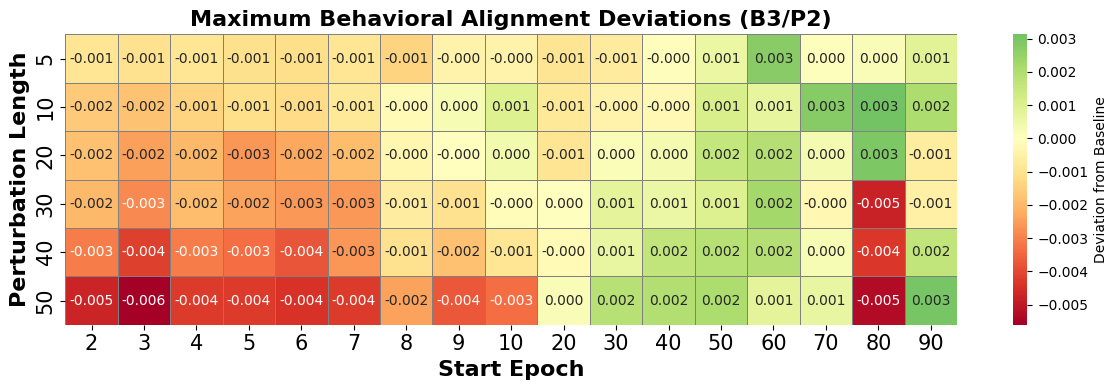


Baseline maximum BA (epoch 40): 0.7694
Mean deviation: -0.0008
Std deviation: 0.0020
Min deviation: -0.0056
Max deviation: 0.0031
Runs better than baseline: 37
Runs worse than baseline: 65


In [53]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# =============================================================================
# Load and filter baseline data
# =============================================================================
baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed3/training_results/training_res_seed3.csv')
baseline_df = pd.read_csv(baseline_csv)
print(f"Baseline data loaded: {len(baseline_df)} epochs")

# Filter baseline to minimum test loss epoch
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()
baseline_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()
print(f"Baseline filtered to {len(baseline_df)} epochs (up to min test loss)")

# =============================================================================
# Load perturbation experiment data
# =============================================================================
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed3_perturbseed2')

# List all training run directories
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir() and d.name.startswith('random_target')])

# Load all data files
all_perturb_length_dfs = {}
for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

print(f"Loaded {len(all_perturb_length_dfs)} perturbation runs")

# =============================================================================
# Filter perturbation data to minimum test loss
# =============================================================================
all_perturb_length_data = {}
for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue
    min_test_loss_idx = df['test_loss'].idxmin()
    filtered_df = df.loc[:min_test_loss_idx].copy()
    all_perturb_length_data[run_name] = filtered_df

print(f"Filtered {len(all_perturb_length_data)} runs to min test loss")

# =============================================================================
# Parse run metadata and calculate deviations
# =============================================================================
baseline_max_ba = baseline_df['behavioral_rsa_rho'].max()
baseline_max_epoch = baseline_df.loc[baseline_df['behavioral_rsa_rho'].idxmax(), 'epoch']

deviation_data = []
for run_name, df in all_perturb_length_data.items():
    # Parse run name: "random_target_e{epoch}_l{length}"
    if 'random_target_e' not in run_name:
        continue
    
    parts = run_name.split('_')
    start_epoch = None
    length = None
    
    for part in parts:
        if part.startswith('e') and part[1:].isdigit():
            start_epoch = int(part[1:])
        elif part.startswith('l') and part[1:].isdigit():
            length = int(part[1:])
    
    if start_epoch is None or length is None or len(df) == 0:
        continue
    
    # Get maximum behavioral alignment value reached in this run
    df_sorted = df.sort_values('epoch')
    max_ba = df_sorted['behavioral_rsa_rho'].max()
    max_ba_epoch = df_sorted.loc[df_sorted['behavioral_rsa_rho'].idxmax(), 'epoch']
    
    # Calculate deviation from baseline maximum
    deviation = max_ba - baseline_max_ba
    
    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'max_ba': max_ba,
        'max_ba_epoch': max_ba_epoch
    })

deviation_df = pd.DataFrame(deviation_data)

# Exclude specific starting epochs (optional - adjust as needed)
# epochs_to_exclude = [60]
# deviation_df = deviation_df[~deviation_df['start_epoch'].isin(epochs_to_exclude)]

print(f"Calculated deviations for {len(deviation_df)} runs")

# Check if filtering is causing issues
print(f"\nBaseline min test loss at epoch: {baseline_df['epoch'].iloc[baseline_min_test_loss_idx]}")
print(f"Baseline max BA at epoch: {baseline_df['epoch'].iloc[baseline_df['behavioral_rsa_rho'].idxmax()]}")
print(f"Are they the same epoch? {baseline_df['epoch'].iloc[baseline_min_test_loss_idx] == baseline_df['epoch'].iloc[baseline_df['behavioral_rsa_rho'].idxmax()]}")

# Check a few perturbation runs
for run_name in list(all_perturb_length_data.keys())[:3]:
    df = all_perturb_length_data[run_name]
    if len(df) > 0:
        print(f"\n{run_name}:")
        print(f"  Min test loss at epoch: {df['epoch'].iloc[df['test_loss'].idxmin()]}")
        print(f"  Max BA at epoch: {df['epoch'].iloc[df['behavioral_rsa_rho'].idxmax()]}")
        
# =============================================================================
# Create heatmap
# =============================================================================
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'
)

heatmap_data = heatmap_data.sort_index(axis=0)
heatmap_data = heatmap_data.sort_index(axis=1)

plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',
    center=0,
    cbar_kws={'label': 'Deviation from Baseline'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Maximum Behavioral Alignment Deviations (B3/P2)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.show()

# =============================================================================
# Print summary statistics
# =============================================================================
print(f"\nBaseline maximum BA (epoch {baseline_max_epoch}): {baseline_max_ba:.4f}")
print(f"Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"Std deviation: {deviation_df['deviation'].std():.4f}")
print(f"Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"Runs better than baseline: {len(deviation_df[deviation_df['deviation'] > 0])}")
print(f"Runs worse than baseline: {len(deviation_df[deviation_df['deviation'] < 0])}")

## ANOTHER SET OF TESTS

In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# =============================================================================
# Load FULL baseline data (NO FILTERING)
# =============================================================================
baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed3/training_results/training_res_seed3.csv')
baseline_df_full = pd.read_csv(baseline_csv)
print(f"Baseline data loaded: {len(baseline_df_full)} epochs")

# Get baseline max BA from FULL dataset
baseline_max_ba = baseline_df_full['behavioral_rsa_rho'].max()
baseline_max_epoch = baseline_df_full.loc[baseline_df_full['behavioral_rsa_rho'].idxmax(), 'epoch']
print(f"Baseline max BA: {baseline_max_ba:.4f} at epoch {baseline_max_epoch}")

# =============================================================================
# Load perturbation experiment data (NO FILTERING)
# =============================================================================
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed3_perturbseed2')

run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir() and d.name.startswith('random_target')])

all_perturb_length_dfs = {}
for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

print(f"Loaded {len(all_perturb_length_dfs)} perturbation runs")

# =============================================================================
# Calculate deviations using FULL datasets
# =============================================================================
deviation_data = []
for run_name, df in all_perturb_length_dfs.items():
    if 'random_target_e' not in run_name or len(df) == 0:
        continue
    
    # Parse run name
    parts = run_name.split('_')
    start_epoch = None
    length = None
    
    for part in parts:
        if part.startswith('e') and part[1:].isdigit():
            start_epoch = int(part[1:])
        elif part.startswith('l') and part[1:].isdigit():
            length = int(part[1:])
    
    if start_epoch is None or length is None:
        continue
    
    # Get max BA from FULL dataset
    max_ba = df['behavioral_rsa_rho'].max()
    max_ba_epoch = df.loc[df['behavioral_rsa_rho'].idxmax(), 'epoch']
    
    # Calculate deviation
    deviation = max_ba - baseline_max_ba
    
    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'max_ba': max_ba,
        'max_ba_epoch': max_ba_epoch
    })

deviation_df = pd.DataFrame(deviation_data)

# Exclude specific epochs if needed
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

print(f"Calculated deviations for {len(deviation_df)} runs")

# =============================================================================
# Create heatmap
# =============================================================================
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'
)

heatmap_data = heatmap_data.sort_index(axis=0)
heatmap_data = heatmap_data.sort_index(axis=1)

plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',
    center=0,
    cbar_kws={'label': 'Deviation from Baseline'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Maximum Behavioral Alignment Deviations (B1/P0)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.show()

# =============================================================================
# Print summary statistics
# =============================================================================
print(f"\nBaseline maximum BA (epoch {baseline_max_epoch}): {baseline_max_ba:.4f}")
print(f"Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"Std deviation: {deviation_df['deviation'].std():.4f}")
print(f"Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"Runs better than baseline: {len(deviation_df[deviation_df['deviation'] > 0])}")
print(f"Runs worse than baseline: {len(deviation_df[deviation_df['deviation'] < 0])}")

FileNotFoundError: [Errno 2] No such file or directory: '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/training_results/training_res_seed3.csv'